# COMP 3602 - Lab test
### Student Name: Hiba Alsarmi


# Important Notes:
* Rename this file as "ID.ipynb" where "ID" represents your student ID.
* Do not modify content or order of any cells with ***questions***
* Use the given empty cells to write code and feel free to add extra cells if needed
* When you need to write an answer make sure the cell is ***Markdown***
* Submit the jupyter notebook "ID.ipynb" along with the pdf version of the notebook **"ID.pdf"**

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

## Load dataset
**1. [1 Point] Download the dataset from elearn and then load it to your notebook.**

In [8]:
file_path=r"C:\Users\71591\Desktop\dataset\Rice_Cammeo_Osmancik.csv"
df=pd.read_csv(file_path)
df

,ID,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,2,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,3,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo
3,4,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo
4,5,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo
...,...,...,...,...,...,...,...,...,...
3805,3806,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,Osmancik
3806,3807,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,Osmancik
3807,3808,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,Osmancik
3808,3809,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,Osmancik


## Descriptive Analysis and Data Pre-processing
**2. [1 Point] Utilize appropriate functions from suitable libraries to determine if the dataset is balanced?**

In [9]:
# Check the class distribution
class_distribution = df['Class'].value_counts()
class_distribution


Osmancik    2180
Cammeo      1630
Name: Class, dtype: int64

In [10]:
# Calculate imbalance ratio
imbalance_ratio = class_distribution.max() / class_distribution.min()
imbalance_ratio


1.3374233128834356

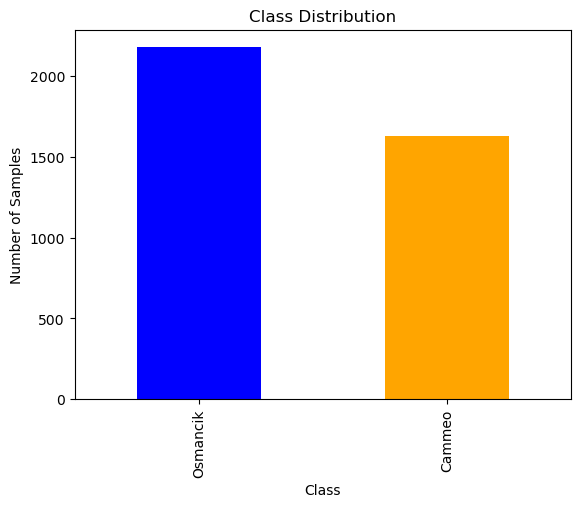

In [11]:
import matplotlib.pyplot as plt

# Plot class distribution
class_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()


**3.	[1 Point] Show the information about the dataset including the total number of observations, the total number of attributes and the type of each attribute in this dataset**

In [12]:
# Display dataset information
df.info()

# Total number of rows and columns
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3810 non-null   int64  
 1   Area               3809 non-null   float64
 2   Perimeter          3808 non-null   float64
 3   Major_Axis_Length  3809 non-null   float64
 4   Minor_Axis_Length  3808 non-null   float64
 5   Eccentricity       3808 non-null   float64
 6   Convex_Area        3809 non-null   float64
 7   Extent             3810 non-null   float64
 8   Class              3810 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 268.0+ KB


(3810, 9)

**4.	[1 Point] For feature selection drop any unusable feature from the dataframe**

In [13]:
# Drop the ID column
df = df.drop(['ID'], axis=1)

# Verify the remaining columns
df.columns


Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

**5.	[1 Point] a) Display a count of missing observations in each attribute. b) Remove the observations with missing values.**

In [14]:
# Count missing values in each column
missing_values = df.isnull().sum()
missing_values


Area                 1
Perimeter            2
Major_Axis_Length    1
Minor_Axis_Length    2
Eccentricity         2
Convex_Area          1
Extent               0
Class                0
dtype: int64

In [15]:
# Drop rows with missing values
df = df.dropna()

# Verify the changes
df.isnull().sum()  
df.shape  


(3801, 8)

In [16]:
missing_values = df.isnull().sum()
missing_values

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

**6.	[1 Point] Create a list that holds the numeric attributes columns’ names.**

In [17]:
# Get the list of numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns


['Area',
 'Perimeter',
 'Major_Axis_Length',
 'Minor_Axis_Length',
 'Eccentricity',
 'Convex_Area',
 'Extent']

**7.	[2 Point] Utilize the appropriate function to Show the five-number summary for all numeric attributes**

In [18]:
# Display the five-number summary for all numeric attributes
df.describe()


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000
mean,12666.944751,454.224257,188.774025,86.309194,0.886881,12951.563273,0.661917
std,1732.606672,35.595402,17.446952,5.733743,0.020819,1777.147195,0.077252
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11372.000000,426.165008,174.358124,82.721268,0.872438,11627.000000,0.598778
50%,12419.000000,448.846008,185.801941,86.428650,0.889033,12705.000000,0.645370
75%,13950.000000,483.657989,203.523453,90.133011,0.902622,14280.000000,0.726608
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


**8.	 [6 Points] a) Show the correlation table. b) Use appropriate plots to show the relationship between every two numeric columns in the dataset, with each data point coloured according to the class attribute. (Make sure plots have a title, xlabel and ylabel).**

In [19]:
# Compute and display the correlation table
correlation_table = df.corr()
correlation_table


C:\Users\71591\AppData\Local\Temp\ipykernel_31064\1225743116.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_table = df.corr()


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,1.000000,0.966453,0.902898,0.787943,0.351215,0.998948,-0.061449
Perimeter,0.966453,1.000000,0.971865,0.629873,0.543913,0.969916,-0.131078
Major_Axis_Length,0.902898,0.971865,1.000000,0.451995,0.710420,0.903267,-0.139899
Minor_Axis_Length,0.787943,0.629873,0.451995,1.000000,-0.292421,0.787418,0.063317
Eccentricity,0.351215,0.543913,0.710420,-0.292421,1.000000,0.351834,-0.198921
Convex_Area,0.998948,0.969916,0.903267,0.787418,0.351834,1.000000,-0.066024
Extent,-0.061449,-0.131078,-0.139899,0.063317,-0.198921,-0.066024,1.000000


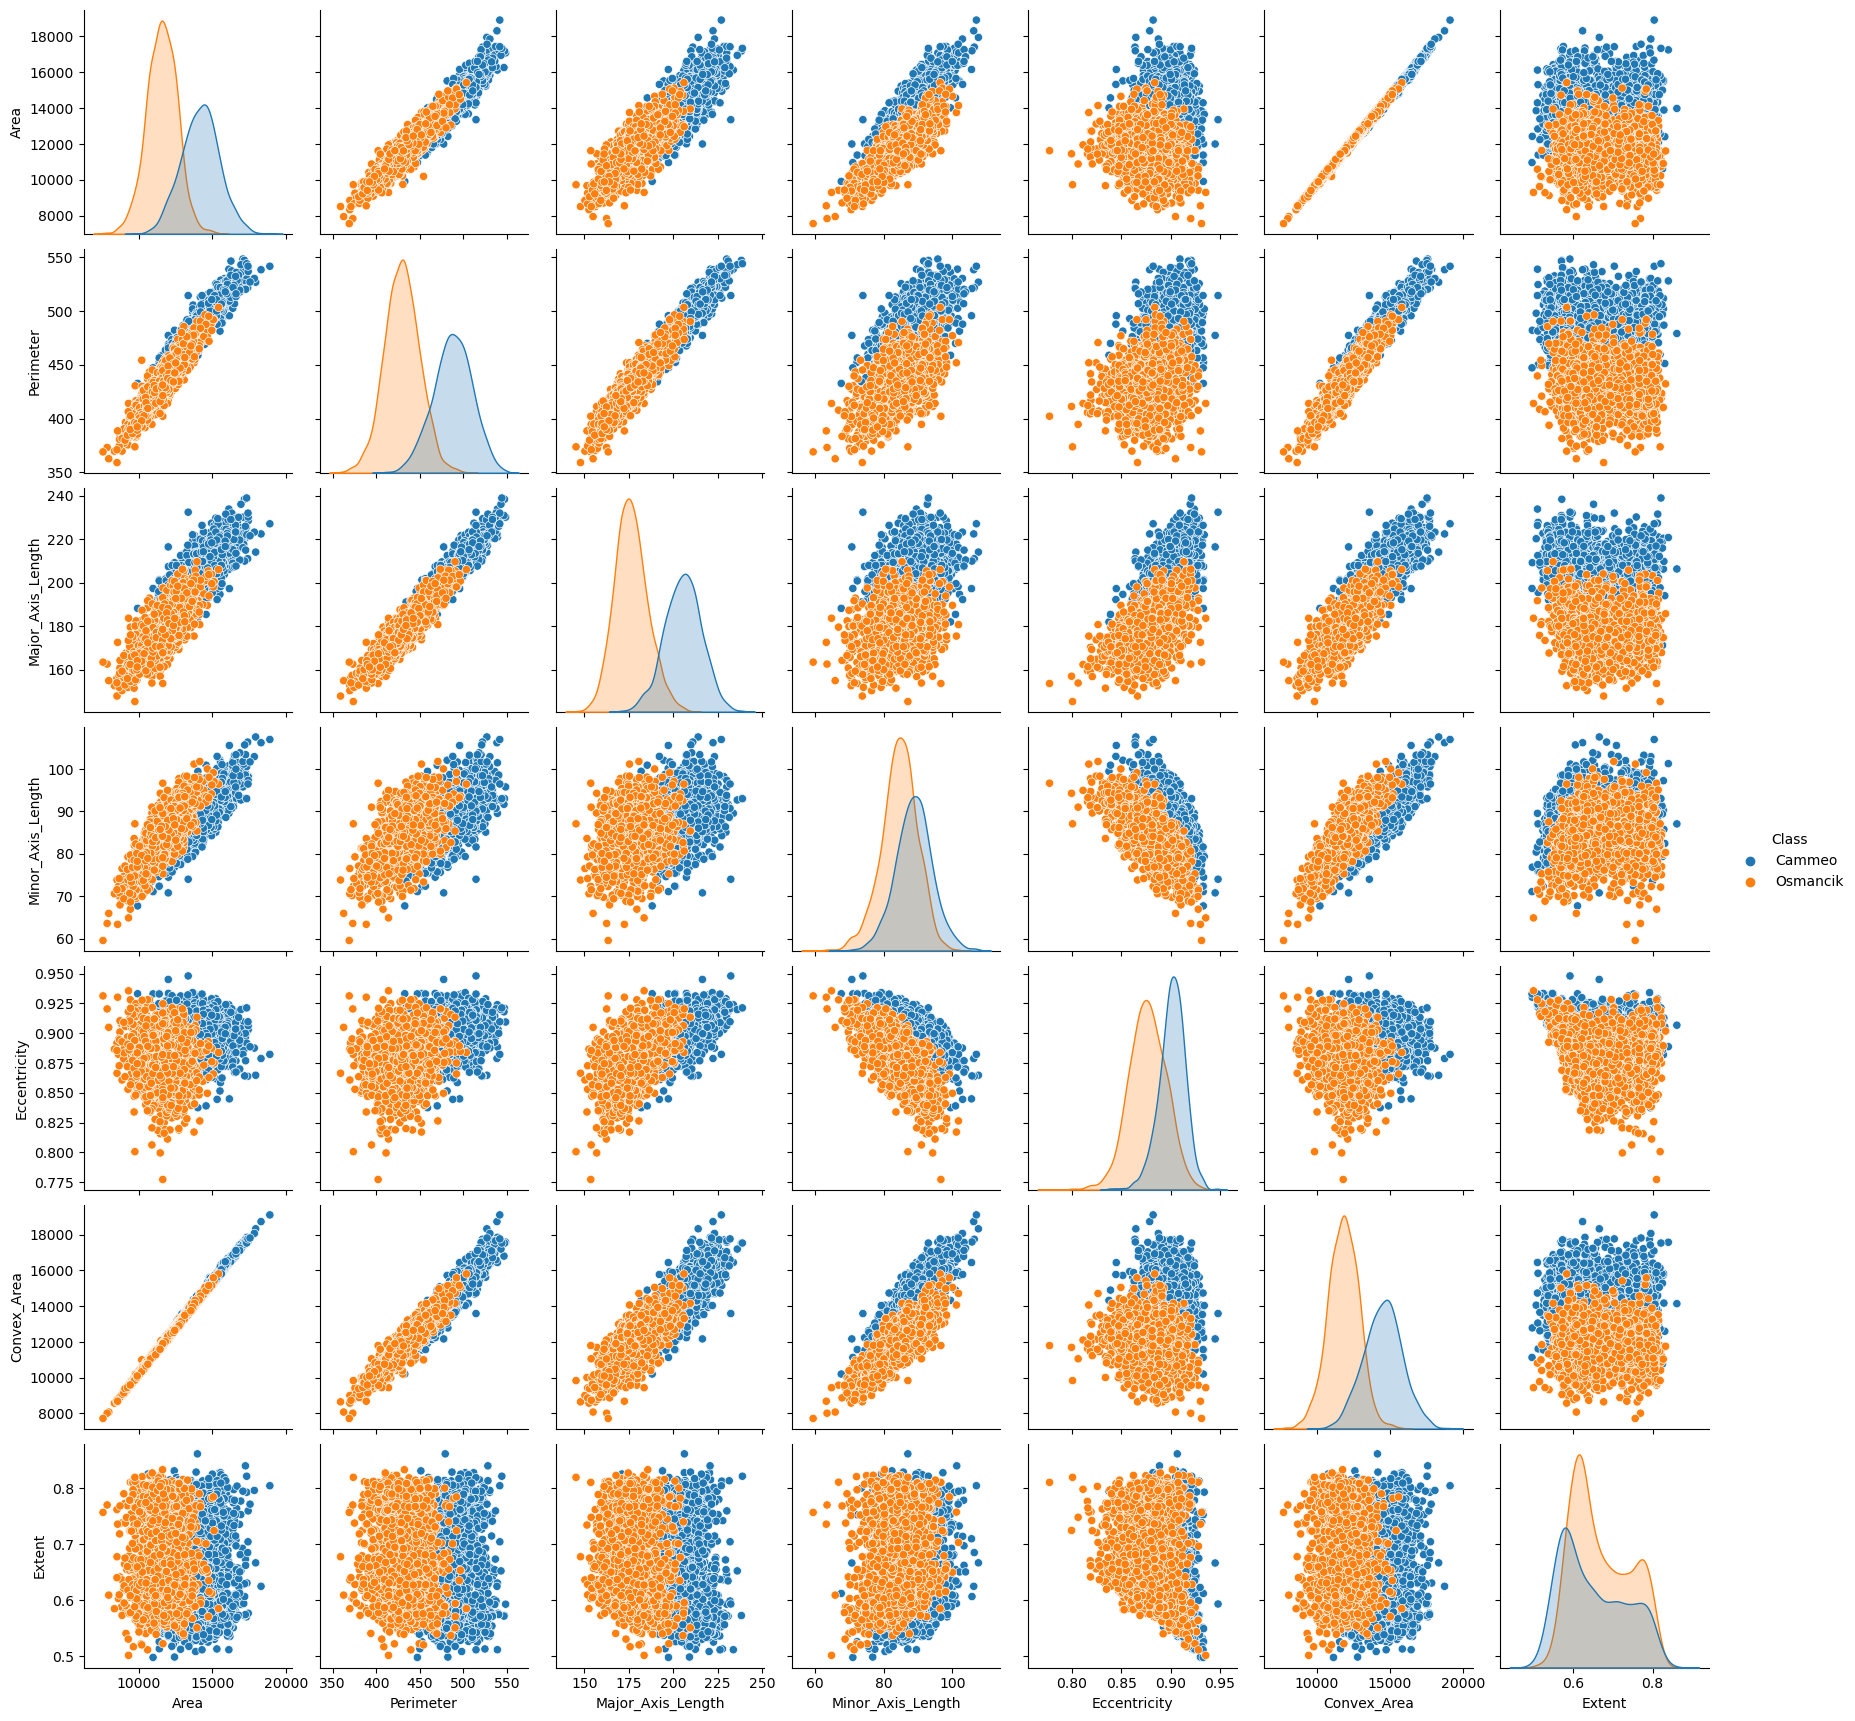

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for numeric attributes colored by Class
sns.pairplot(df, hue='Class', diag_kind='kde')
plt.show()


**9.	[2 Points] a) Show the distribution of the ‘Area’ for the ‘Cammeo’ class and the ‘Osmancik’ class separately. b) Point out the differences between the two histograms.**

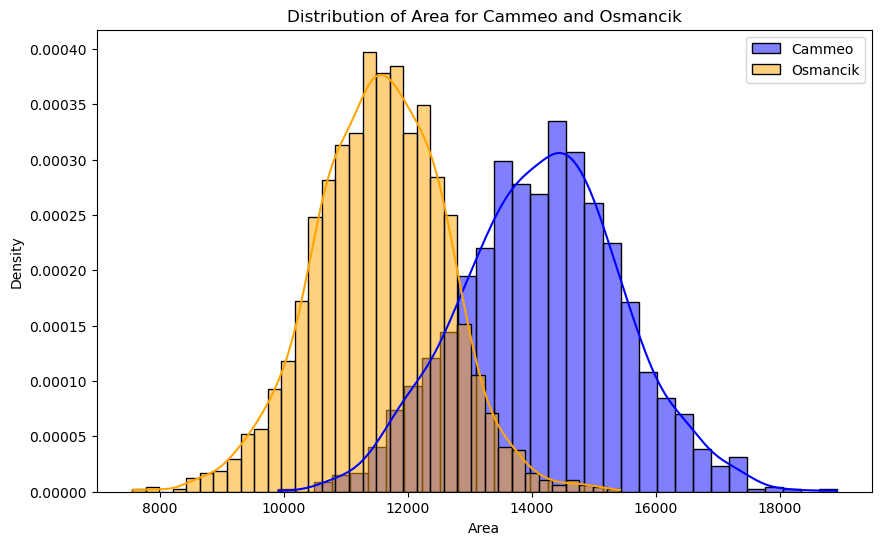

In [22]:
##(A)
# Plot histograms for Area by Class
plt.figure(figsize=(10, 6))

# Plot for Cammeo
sns.histplot(df[df['Class'] == 'Cammeo']['Area'], color='blue', kde=True, label='Cammeo', stat='density')

# Plot for Osmancik
sns.histplot(df[df['Class'] == 'Osmancik']['Area'], color='orange', kde=True, label='Osmancik', stat='density')

# Add titles and labels
plt.title('Distribution of Area for Cammeo and Osmancik')
plt.xlabel('Area')
plt.ylabel('Density')
plt.legend()

plt.show()


In [23]:
##(b)
#The Area distribution for Cammeo grains is centered around larger values (with a mean of 14,163),
#while Osmancik grains are mostly concentrated around smaller values (with a mean of 11,550), with some overlap between the two distributions.

In [24]:
# Calculate the mean for each class
mean_area_cammeo = df[df['Class'] == 'Cammeo']['Area'].mean()
mean_area_osmancik = df[df['Class'] == 'Osmancik']['Area'].mean()

mean_area_cammeo, mean_area_osmancik


(14162.627692307693, 11549.994025735294)

**10.	[6 Points] a) Use appropriate visualization to identify all attribute that has outliers and all the attributes with no outliers. b) Use an appropriate way to scale the data and redo the visualization**

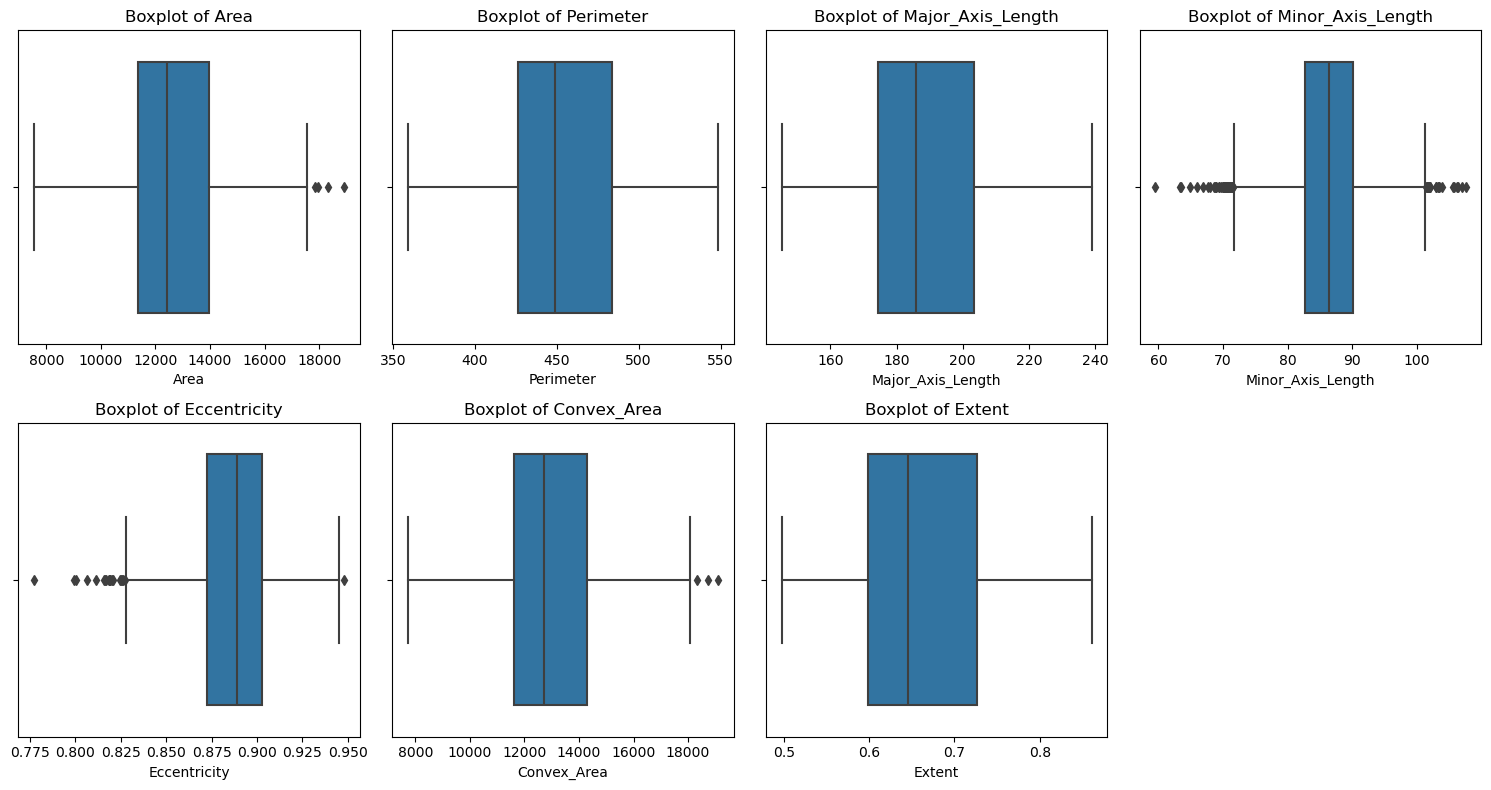

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for each numeric attribute
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


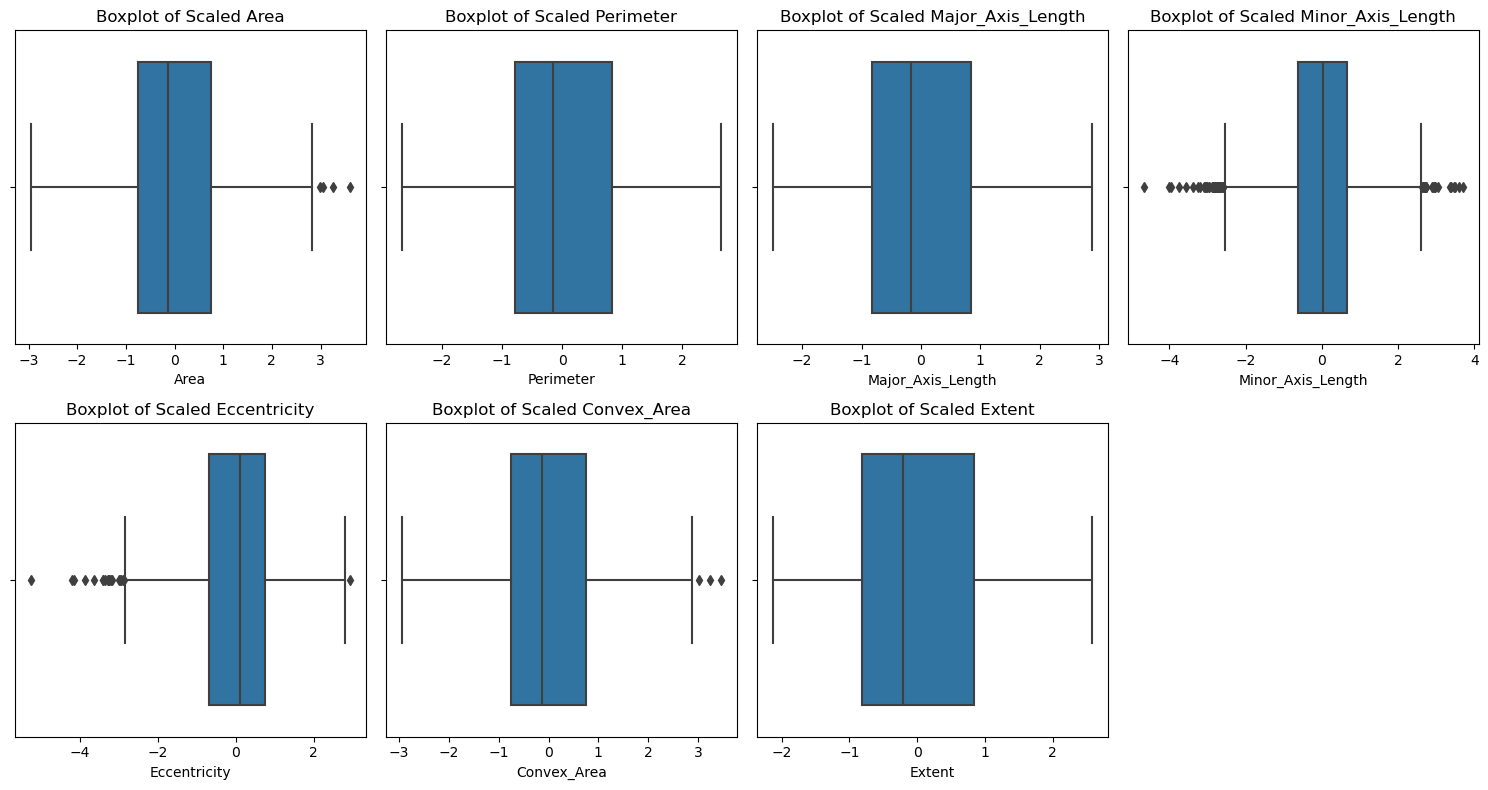

In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric features
df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df_scaled[numeric_columns])

# Create boxplots for the scaled features
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=df_scaled[col])
    plt.title(f'Boxplot of Scaled {col}')
plt.tight_layout()
plt.show()



In [28]:
# Summary statistics of the scaled data (mean and standard deviation)
scaled_summary = df_scaled[numeric_columns].describe()
scaled_summary.loc[['mean', 'std']]


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
mean,-5.981944e-17,9.571110e-16,0.000000,2.990972e-16,4.785555e-16,1.196389e-16,4.037812e-16
std,1.000132e+00,1.000132e+00,1.000132,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00


**11.	[2 Points] Perform appropriate preprocessing techniques on the categorical attribute(s) in the dataset.**

In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Class' column
df['Class'] = label_encoder.fit_transform(df['Class'])

# Verify the encoding
df['Class'].head()


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int32

## Multivariate Data Analysis (Classification)
**12.	[6 Points] Perform multivariate data analysis for classification using the following steps for the k nearest neighbor.**
* a.	Create feature (X) of the scaled data and target (y)
* b.	Split the dataset into a training set (70%) and testing set (30%), set random_state to 42. Each set (training and test) should contain approximately the same percentage of samples of each target class as the complete set. 
* c.	Run the Knn classifier with one neighbor 
* d.	Print a classification report.
* e.	Write a conclusion (in 2 sentences) summarizing the most important finding of this task.

In [30]:
# Create feature matrix X (all columns except 'Class')
X = df.drop(columns=['Class'])

# Create target vector y (only the 'Class' column)
y = df['Class']


In [31]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verify the split sizes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2660, 7), (1141, 7), (2660,), (1141,))

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model to the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [33]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.84      0.83       488
           1       0.88      0.87      0.87       653

    accuracy                           0.86      1141
   macro avg       0.85      0.85      0.85      1141
weighted avg       0.86      0.86      0.86      1141



In [34]:
#The KNN classifier performed well with an accuracy of 86%. It’s slightly better at identifying Osmancik rice grains but still performs well across both classes.
#The model has a good balance between precision and recall, and the F1-scores indicate it's generally reliable for both classes.

## BONUS 
**13.	[BONUS 10 Points] Grid Search is a method used to find optimal hyperparameters that result in the highest prediction accuracy for a model.**
* a.	Apply [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classification on the sets you have prepared for the previous question. 
* b.	Apply [Grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best hyperparameter for the logistic regression model. 
* c.	Print a classification report of the best LR model
* d.	Compare the results of LR model and Knn model (in short)

In [35]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
logreg = LogisticRegression(random_state=42)

# Fit the Logistic Regression model
logreg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [36]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'C': 0.1, 'solver': 'lbfgs'}


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# Predict using the best Logistic Regression model
y_pred_logreg = grid_search.best_estimator_.predict(X_test)

# Print the classification report for the best Logistic Regression model
print(classification_report(y_test, y_pred_logreg))


              precision    recall  f1-score   support

           0       0.91      0.91      0.91       488
           1       0.93      0.93      0.93       653

    accuracy                           0.92      1141
   macro avg       0.92      0.92      0.92      1141
weighted avg       0.92      0.92      0.92      1141



In [38]:
#Logistic Regression outperforms KNN in terms of precision, recall, F1-score, and accuracy.
#The Logistic Regression model shows a more balanced performance, especially for Osmancik,
#with 92% accuracy and higher precision/recall for both classes.